# 3. 
Joe finds another star with RV variations. These are less obvious. 

## a. What is the period of variations in this star's radial velocities?

In [48]:
import pandas as pd
from matplotlib import pyplot as plt
%pylab inline

filename='rv_3.dat'
df2 = pd.read_csv(filename,delim_whitespace=True)# error_bad_lines=False, skiprows=?

df2.columns=['t','RV','err']

t2, RV2, err2 = df2.t, df2.RV*1000, df2.err*1000
df2.head()

Populating the interactive namespace from numpy and matplotlib


/home/dl/miniconda2/envs/transit/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['power']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


,t,RV,err
0,2.454434e+06,-1.50827,0.00450
1,2.454435e+06,-1.59145,0.00420
2,2.454436e+06,-1.69089,0.00454
3,2.454440e+06,-1.37548,0.00698
4,2.454441e+06,-1.39927,0.00411


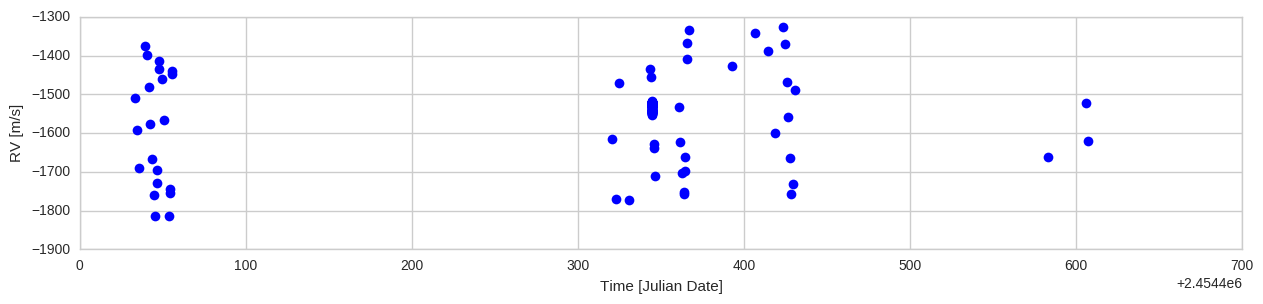

In [49]:
import seaborn as sb

with sb.axes_style('whitegrid'):
    fig, ax = plt.subplots(1,1,figsize=(15,3))
    ax.plot(t2, RV2,'bo');
    ax.errorbar(t2,RV2,yerr=err2, linestyle="None") #error bars smaller than the datapoints
    ax.set_xlabel('Time [Julian Date]');
    ax.set_ylabel('RV [m/s]');

In [50]:
import gatspy
from gatspy.periodic import LombScargleFast
  
#RV2 /= np.median(df2.RV)                 #normalize

model = LombScargleFast().fit(t2, RV2)
periods, power = model.periodogram_auto(nyquist_factor=100)

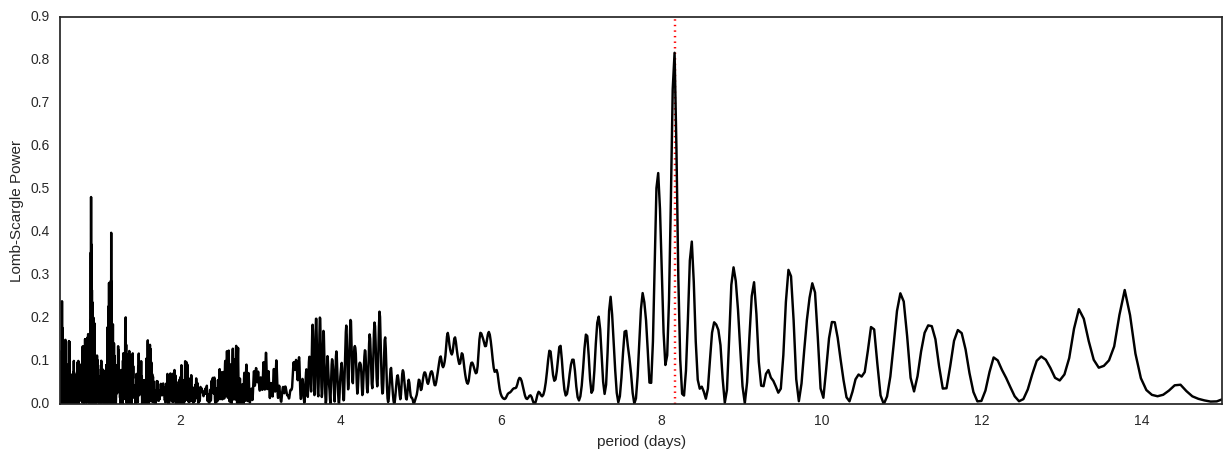

In [51]:
idx1 = periods > 1
idx2 = np.argmax(power[idx1])
peak2 = periods[idx1][idx2]

with sb.axes_style('white'):
    fig, ax = plt.subplots(1,1,figsize=(15,5))
    ax.plot(periods, power, 'k-')
    ax.set(xlim=(0.5, 15),
       xlabel='period (days)',
       ylabel='Lomb-Scargle Power')
    ax.vlines(peak2, *ax.get_ylim(), linestyles='dotted', colors='r')

In [52]:
print("Period is {0:.3} days".format(peak2))

Period is 8.17 days


Let's mask the red data points and check the periodogram again.

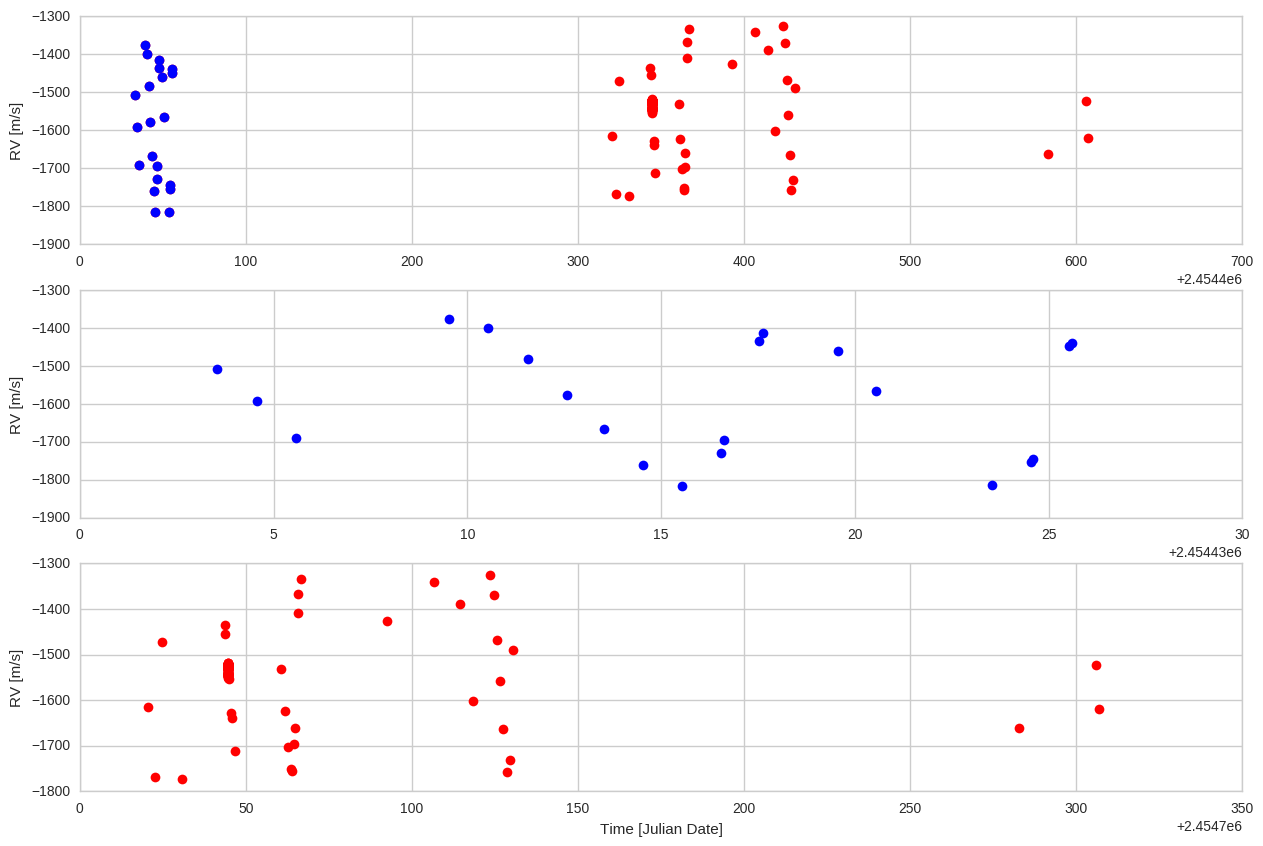

In [53]:
#fig, ax = plt.subplots()
#df.plot(yerr=df.error, ax=ax, kind='scatter')

cutoff2 = 21
t2a, RV2a, err2a = t2[:cutoff2],RV2[:cutoff2], err2[:cutoff2]

with sb.axes_style('whitegrid'):
    fig, ax = plt.subplots(3,1,figsize=(15,10))
    ax[0].plot(t2,RV2,'ro')  #all data
    ax[0].plot(t2a,RV2a, 'bo') #color t2a and RV2a as blue
    #ax[0].set_xlabel('Time [Julian Date]')
    ax[0].set_ylabel('RV [m/s]')
    ax[1].plot(t2a,RV2a, 'bo') #Zoom the blue datapoints
    #ax[1].set_xlabel('Time [Julian Date]');
    ax[1].set_ylabel('RV [m/s]');
    ax[2].plot(t2[cutoff2:],RV2[cutoff2:],'ro');
    #ax[2].set_xlim([t2[cutoff2],t2[len(df2)-1]]) #take the 
    ax[2].set_xlabel('Time [Julian Date]');
    ax[2].set_ylabel('RV [m/s]');

/home/dl/miniconda2/envs/transit/lib/python3.5/site-packages/gatspy/periodic/lomb_scargle_fast.py:429: UserWarning: For smaller datasets, the approximation used by LombScargleFast may not be suitable.
It is recommended to use LombScargle instead.
To silence this warning, set ``silence_warnings=True``
  warnings.warn("For smaller datasets, the approximation used by "


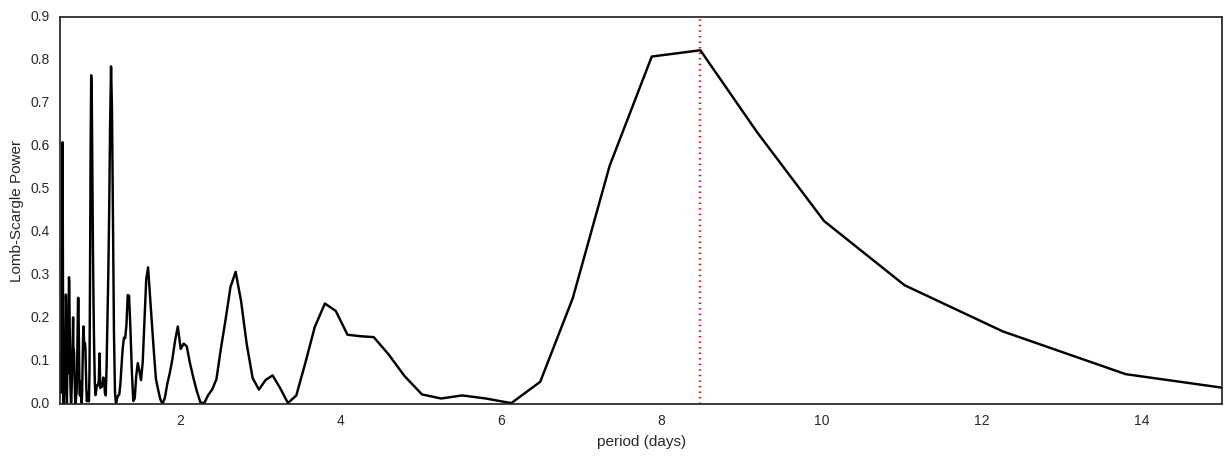

In [54]:
import gatspy
from gatspy.periodic import LombScargleFast
  
#RV2 /= np.median(df2.RV)                 #normalize

model = LombScargleFast().fit(t2a, RV2a)
periods, power = model.periodogram_auto(nyquist_factor=100)

idx1a = periods > 1
idx2a = np.argmax(power[idx1a])
peak2a = periods[idx1a][idx2a]

with sb.axes_style('white'):
    fig, ax = plt.subplots(1,1,figsize=(15,5))
    ax.plot(periods, power, 'k-')
    ax.set(xlim=(0.5, 15),
       xlabel='period (days)',
       ylabel='Lomb-Scargle Power')
    ax.vlines(peak2a, *ax.get_ylim(), linestyles='dotted', colors='r')

In [55]:
print("Period without the masked datapoints is {0:.3} days.".format(peak2a))

Period without the masked datapoints is 8.49 days.


Let's first approximate the fitting parameters for better initial guess. 

In [56]:
import scipy.optimize as opt
#opt.minimize?

K = max(RV2a)+5
def simple_sin(theta, x):
    K, P, phi, vsys = theta
    return K*np.sin(2*np.pi*(x-phi)/P)+vsys
    
def skewed(theta, x):
    K, P, phi, vsys = theta
    #return K*np.cos(2*np.pi*(x-phi)/P)+vsys
    return (K/np.pi)*np.arctan(1/np.tan((x-phi)/P))+vsys
    #return -K*np.cos((2*np.pi/P)+np.arcsin((x-phi)/P))+vsys

#skewed RV signal implies impulsive atmospheric motion
def objective(theta, xi, yi):
    model = skewed(theta, xi)
    return np.sum((model - yi)**2) #res**2


init_guess2 = [200,peak2a,0,-1600] #K,P,phi


optimize2 = opt.minimize(objective, init_guess2, args=(t2a,RV2a), method='nelder-mead')
print(optimize2)

 final_simplex: (array([[  2.08239627e+02,   8.23767072e+00,   1.27605927e-04,
         -1.57419719e+03],
       [  2.08239617e+02,   8.23767072e+00,   1.27606000e-04,
         -1.57419725e+03],
       [  2.08239635e+02,   8.23767072e+00,   1.27605862e-04,
         -1.57419714e+03],
       [  2.08239618e+02,   8.23767072e+00,   1.27605989e-04,
         -1.57419724e+03],
       [  2.08239620e+02,   8.23767072e+00,   1.27605980e-04,
         -1.57419723e+03]]), array([ 348107.60046478,  348107.60046508,  348107.60046548,
        348107.6004662 ,  348107.60046693]))
           fun: 348107.60046477651
       message: 'Optimization terminated successfully.'
          nfev: 689
           nit: 360
        status: 0
       success: True
             x: array([  2.08239627e+02,   8.23767072e+00,   1.27605927e-04,
        -1.57419719e+03])


In [57]:
for i in optimize2.x: #x is the result of opt.minimize
    print('Success={}'.format(optimize2.success))
    print("parameter optimum: {}".format(i))

Success=True
parameter optimum: 208.23962668487266
Success=True
parameter optimum: 8.2376707200244
Success=True
parameter optimum: 0.00012760592716716098
Success=True
parameter optimum: -1574.1971921745176


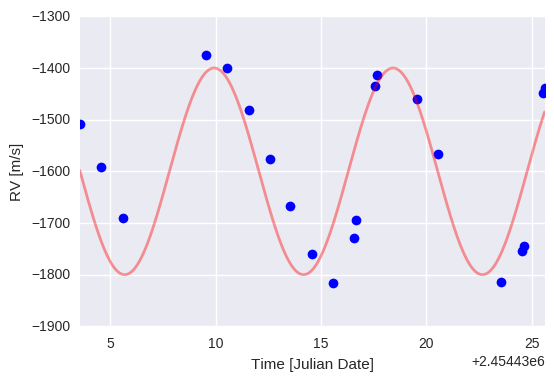

In [58]:
x2 = np.arange(t2[0],t2[cutoff2-1],0.01)
plt.plot(t2,RV2,'bo');
plt.plot(x2, simple_sin(init_guess2, x2),'r-', lw=2, alpha=0.4)
#plt.plot(x2, skewed(init_guess2, x2),'g-', lw=2, alpha=0.4)
plt.errorbar(t2a,RV2a,yerr=err2a, linestyle="None") #error bars smaller than the datapoints
plt.xlim([t2[0],t2[cutoff2-1]])
plt.xlabel('Time [Julian Date]');
plt.ylabel('RV [m/s]');

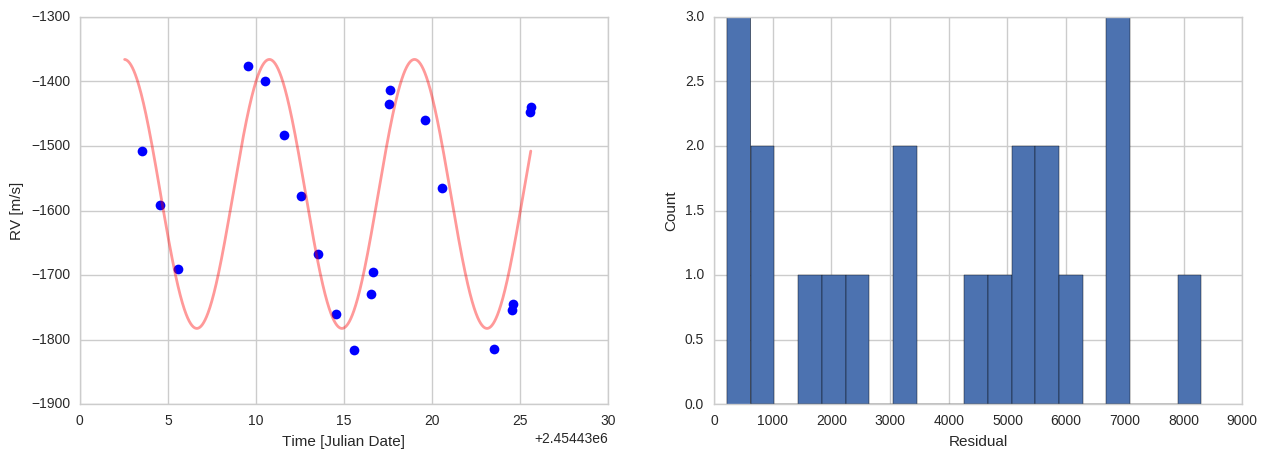

In [59]:
new_guess2 = optimize2.x

x2 = np.arange(t2[0]-1,t2[cutoff2-1],0.01)
#x2 = np.arange(t2[0]-1,t2[100],0.01)

res2=[]
for i,j in zip(t2a,RV2a): 
    res2.append(np.sum(simple_sin(new_guess2, i)-j)**2)
             
with sb.axes_style('whitegrid'):
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    ax[0].plot(t2a,RV2a,'bo')
    ax[0].plot(x2, simple_sin(new_guess2, x2),'r-', lw=2, alpha=0.4)
    #ax[0].plot(x2, skewed(new_guess2, x2),'g-', lw=2, alpha=0.4)
    ax[0].set_xlabel('Time [Julian Date]')
    ax[0].set_ylabel('RV [m/s]')
    #ax[0].set_xlim([t2[0]-1,t2[cutoff2-1]])
    #ax[0].set_xlim([t2[0]-1,t2[110]])
    ax[1].hist(res2,bins=20)
    ax[1].set_xlabel('Residual')
    ax[1].set_ylabel('Count')

In [60]:
print("The optimized period without the masked datapoints is {0:.3} days.".format(optimize2.x[1]))

The optimized period without the masked datapoints is 8.24 days.


Let's check the periodogram of the masked datapoints this time. 

I thought I'm can access the last 3 datapoints on the right by sorting t2b. But it turns out the 3 data points are in indexes= 46,47,48.

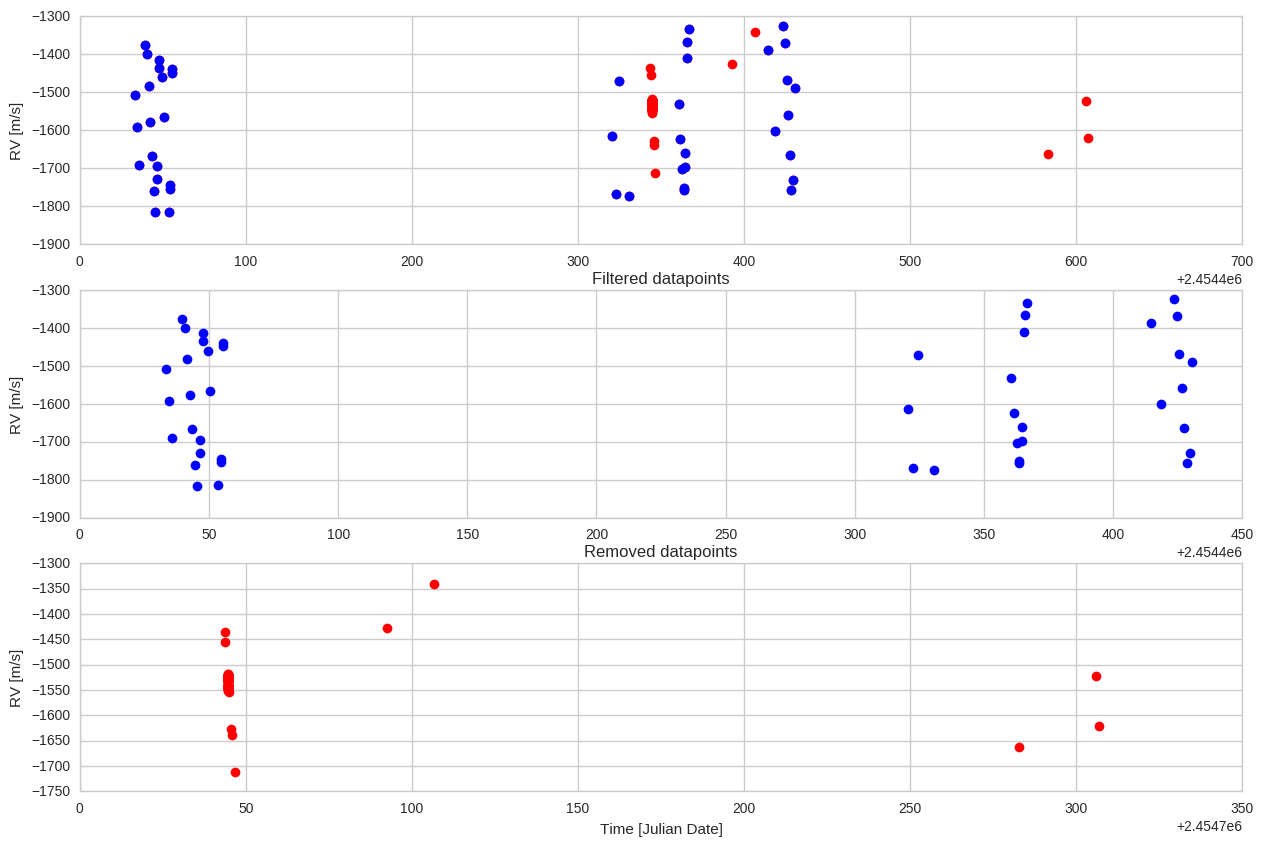

In [61]:
cutoff2b=45
#46,47,48 is the 3 last datapoints
t2b, RV2b, err2b = t2[:cutoff2b],RV2[:cutoff2b], err2[:cutoff2b]

with sb.axes_style('whitegrid'):
    fig, ax = plt.subplots(3,1,figsize=(15,10))
    ax[0].plot(t2,RV2,'ro')  #all data
    ax[0].plot(t2b,RV2b, 'bo') #color t2a and RV2a as blue
    #ax[0].set_xlabel('Time [Julian Date]')
    ax[0].set_ylabel('RV [m/s]')
    ax[1].plot(t2b,RV2b, 'bo') #Zoom the blue datapoints
    #ax[1].set_xlabel('Time [Julian Date]');
    ax[1].set_ylabel('RV [m/s]');
    ax[1].set_title('Filtered datapoints')
    ax[2].plot(t2[cutoff2b:],RV2[cutoff2b:],'ro');
    #ax[2].set_xlim([t2[cutoff2],t2[len(df2)-1]]) #take the 
    ax[2].set_xlabel('Time [Julian Date]');
    ax[2].set_ylabel('RV [m/s]');
    ax[2].set_title('Removed datapoints');

Let's now remove the last 3 datapoints and determine whether they are outliers (i.e. affect the periodicity).

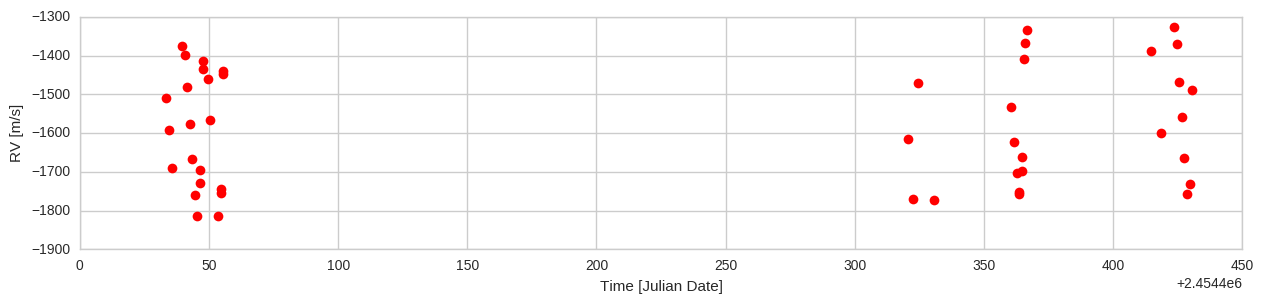

In [62]:
cutoff2b = 45
t2b, RV2b, err2b = t2[:cutoff2b],RV2[:cutoff2b], err2[:cutoff2b]
t2b.append(t2[cutoff2b+3:]) 
RV2b.append(RV2[cutoff2b+3:])
err2b.append(err2[cutoff2b+3:])

# mask = 4
# t2b, RV2b, err2b = t2[cutoff2:-mask],RV2[cutoff2:-mask], err2[cutoff2:-mask]

with sb.axes_style('whitegrid'):
    fig, ax = plt.subplots(1,1,figsize=(15,3))
    ax.plot(t2b,RV2b,'ro');
    #ax.plot(t2b[cutoff2:],RV2b[cutoff2:],'ro');
    #ax.errorbar(t2b,RV2b,yerr=err2b, linestyle="None") #error bars smaller than the datapoints
    #ax.set_xlim([t2[cutoff2],t2[len(df2)-1]]) #take the 
    ax.set_xlabel('Time [Julian Date]');
    ax.set_ylabel('RV [m/s]');

/home/dl/miniconda2/envs/transit/lib/python3.5/site-packages/gatspy/periodic/lomb_scargle_fast.py:429: UserWarning: For smaller datasets, the approximation used by LombScargleFast may not be suitable.
It is recommended to use LombScargle instead.
To silence this warning, set ``silence_warnings=True``
  warnings.warn("For smaller datasets, the approximation used by "


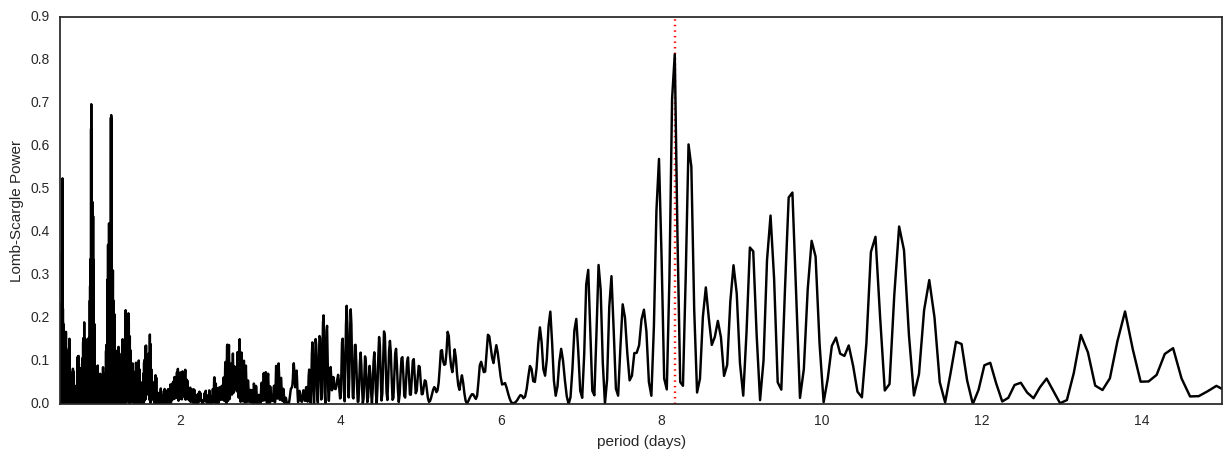

In [63]:
import gatspy
from gatspy.periodic import LombScargleFast
  
#RV2 /= np.median(df2.RV)                 #normalize

model = LombScargleFast().fit(t2b, RV2b)
periods, power = model.periodogram_auto(nyquist_factor=100)

idx1b = periods > 1
idx2b = np.argmax(power[idx1b])
peak2b = periods[idx1b][idx2b]

with sb.axes_style('white'):
    fig, ax = plt.subplots(1,1,figsize=(15,5))
    ax.plot(periods, power, 'k-')
    ax.set(xlim=(0.5, 15),
       xlabel='period (days)',
       ylabel='Lomb-Scargle Power')
    ax.vlines(peak2b, *ax.get_ylim(), linestyles='dotted', colors='r')

In [64]:
print("The period of the previously masked datapoints is {0:.3} days.".format(peak2b))

The period of the previously masked datapoints is 8.17 days.


In [65]:
print("The difference in the computed periods between the two datasets (masked & unmasked) is {} m/s.".format(peak2a-peak2b))

The difference in the computed periods between the two datasets (masked & unmasked) is 0.31926340776787043 m/s.


Since the difference is very small, it doesn't matter if we either mask or remove few outliers. Nonetheless, I will mask some dataset (because it produces nice periodogram) and then make a fit given all datapoints. 

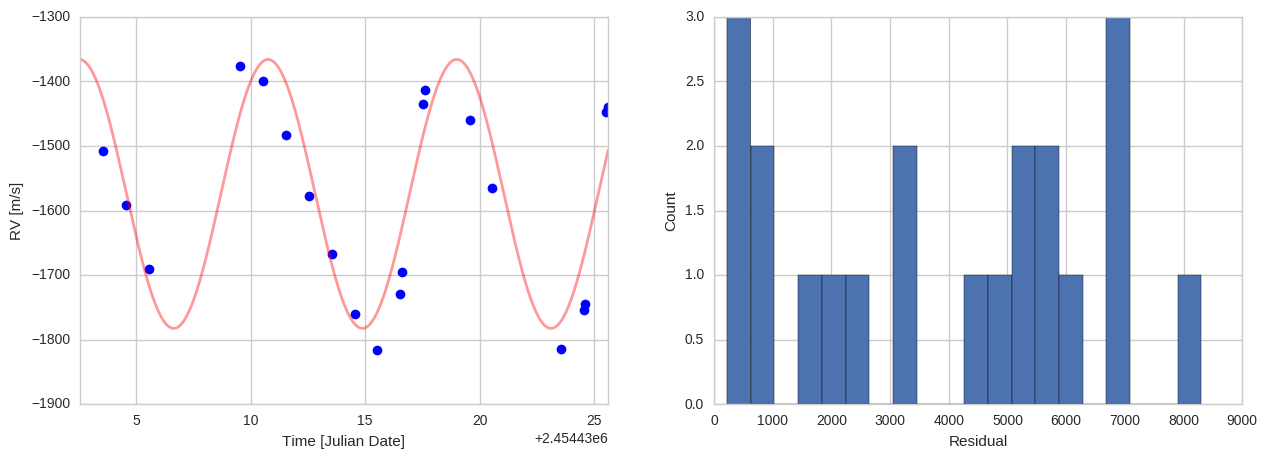

In [66]:
x2 = np.arange(t2b[0]-1,t2b[-1:]+1,0.01) #all datapoints

res2=[]
for i,j in zip(t2a,RV2a): 
    res2.append(np.sum(simple_sin(new_guess2, i)-j)**2)
             
with sb.axes_style('whitegrid'):
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    ax[0].plot(t2a,RV2a,'bo')
    ax[0].plot(x2, simple_sin(new_guess2, x2),'r-', lw=2, alpha=0.4)
    ax[0].set_xlabel('Time [Julian Date]')
    ax[0].set_ylabel('RV [m/s]')
    ax[0].set_xlim([t2[0]-1,t2[cutoff2-1]])
    ax[1].hist(res2,bins=20)
    ax[1].set_xlabel('Residual')
    ax[1].set_ylabel('Count')

## b. Assuming that this is a Sun-like star, what is the orbital radius and mass of the planet?

In [67]:
G= 6.67E-11
M_sun= 1.989E30 # in kg
M_Jup = 1.898E27 # in kg
M_Earth = 5.972E24
M_star = M_sun
au = 1.496E11 #in meters

P=optimize2.x[1]
v_star=optimize2.x[0]

M_0= 0

a = ((G*(M_star+M_0)*(P*60*60*24)**2)/(4*np.pi**2))**(1/3)
print("Semi-major axis= {0:.3} m or {1:.3} AU".format(a, a/au))

v_planet = 2*np.pi*a/P
print("v_planet= {0:.3} m/s".format(v_planet))
M_planet=M_star*abs(v_star)/v_planet

print("M_planet= {0:.3} kg or {1:.3} M_Jup or or {2:.3} M_Earth".format(M_planet, M_planet/M_Jup, M_planet/M_Earth))

Semi-major axis= 1.19e+10 m or 0.0798 AU
v_planet= 9.11e+09 m/s
M_planet= 4.55e+22 kg or 2.4e-05 M_Jup or or 0.00762 M_Earth


## c. Bonus! This is a real exoplanet. Which one?

Isn't it possible we have multiple planets in this system? May be I can 